<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 9 </b></center>
<center><b><h5>K-means, K-Medoids</b></center>
<pre>    

# Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Step 2: Load the Dataset
Load Given dataset -  StudentsPerformance.csv

In [2]:
file_path = 'StudentsPerformance.csv'
df = pd.read_csv(file_path)

# Step 3: Data Overview
In this step, we examine the dataset structure, summary statistics, and check for missing values.

In [3]:
print("Dataset Head:\n", df.head())
print("\nDataset Information:\n")
df.info()
print("\nSummary Statistics:\n", df.describe())
print("\nMissing Values:\n", df.isnull().sum())


Dataset Head:
    gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column     

# Step 4: Display PairPlot

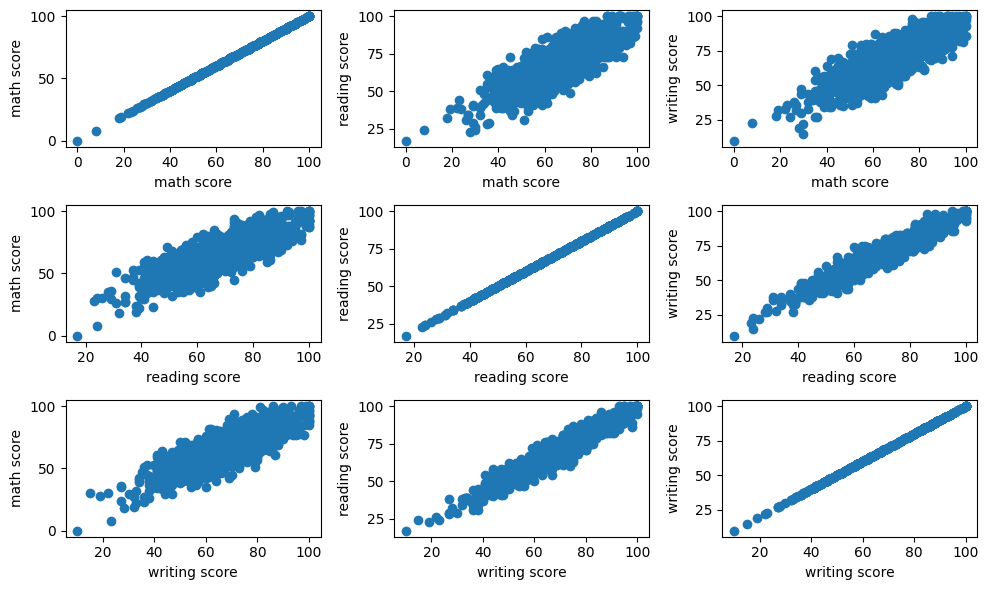

In [5]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10, 6))
for i, col1 in enumerate(numeric_columns):
    for j, col2 in enumerate(numeric_columns):
        plt.subplot(len(numeric_columns), len(numeric_columns), i * len(numeric_columns) + j + 1)
        plt.scatter(df[col1], df[col2])
        plt.xlabel(col1)
        plt.ylabel(col2)
plt.tight_layout()
plt.show()

# Step 5: Correlation heatmap

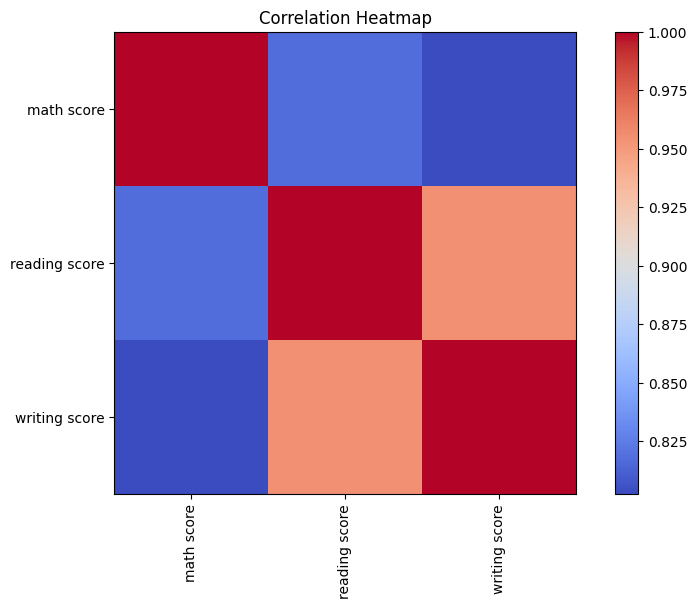

In [6]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Heatmap')
plt.show()

# Step 6: Distribution of numerical features

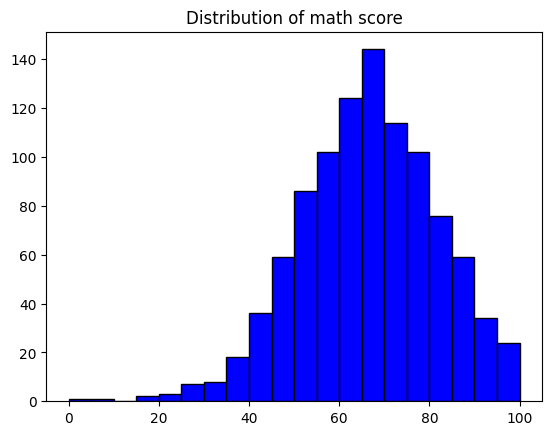

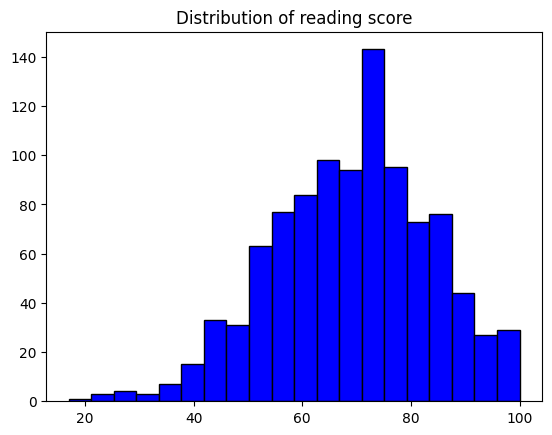

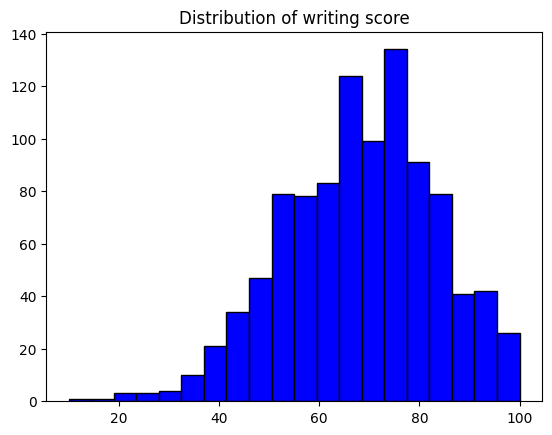

In [7]:
numeric_features = df.select_dtypes(include=[np.number]).columns
for feature in numeric_features:
    plt.figure()
    plt.hist(df[feature], bins=20, color='blue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.show()

# Step 7: Apply StandardScaler

In [8]:
min_vals = df.select_dtypes(include=[np.number]).min()
max_vals = df.select_dtypes(include=[np.number]).max()
scaled_data = (df.select_dtypes(include=[np.number]) - min_vals) / (max_vals - min_vals)


# Step 8: Elbow method to find optimal k

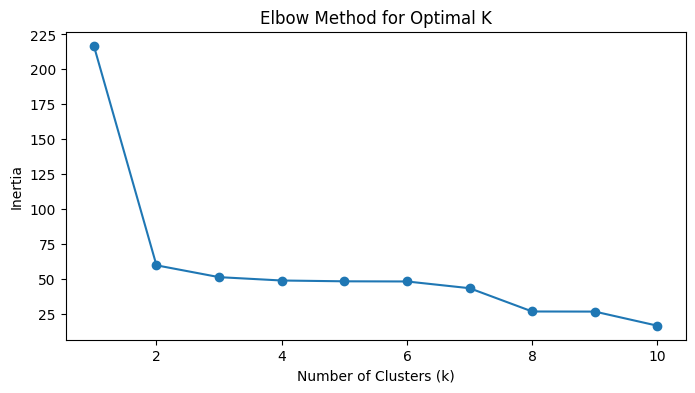

In [9]:
def calculate_inertia(data, k):
    centroids = data.sample(n=k, random_state=42).values
    inertia = 0
    for point in data.values:
        distances = np.linalg.norm(point - centroids, axis=1)
        inertia += np.min(distances) ** 2
    return inertia

inertia = []
K_range = range(1, 11)
for k in K_range:
    inertia.append(calculate_inertia(scaled_data, k))

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Step 9:Based on the elbow plot, choose an appropriate k value (e.g., k=3)

In [10]:
k = 3
centroids = scaled_data.sample(n=k, random_state=42).values
clusters = [np.argmin([np.linalg.norm(point - centroid) for centroid in centroids]) for point in scaled_data.values]


# Step 10: Print Cluster Center

In [11]:
print("CLuster Center:\n", centroids)


CLuster Center:
 [[0.91       0.8313253  0.82222222]
 [0.53       0.59036145 0.7       ]
 [0.8        0.6746988  0.68888889]]


# Step 11: Plot Cluster

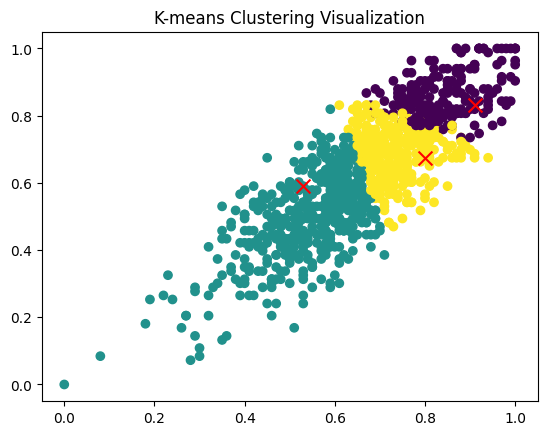

In [12]:
plt.scatter(scaled_data.iloc[:, 0], scaled_data.iloc[:, 1], c=clusters, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=100)
plt.title('K-means Clustering Visualization')
plt.show()

# Step 12:Analyze clusters 

In [ ]:
# Select only numeric columns for groupby mean analysis
numeric_columns = df.select_dtypes(include=[np.number]).columns
print("Cluster Analysis:\n", df.groupby('Cluster')[numeric_columns].mean())


# Step 13: Perform K-Medoids

In [14]:
initial_medoids_indices = scaled_data.sample(n=k, random_state=42).index
medoids = scaled_data.loc[initial_medoids_indices].values

In [15]:
# Assign clusters based on closest medoids
clusters_medoids = []
for point in scaled_data.values:
    distances = [np.linalg.norm(point - medoid) for medoid in medoids]
    clusters_medoids.append(np.argmin(distances))

print("K-Medoids Cluster Centers:\n", medoids)

K-Medoids Cluster Centers:
 [[0.91       0.8313253  0.82222222]
 [0.53       0.59036145 0.7       ]
 [0.8        0.6746988  0.68888889]]


# Step:14 Comparison of K-means and K-medoids Clusters

Text(0.5, 1.0, 'K-means Clusters')

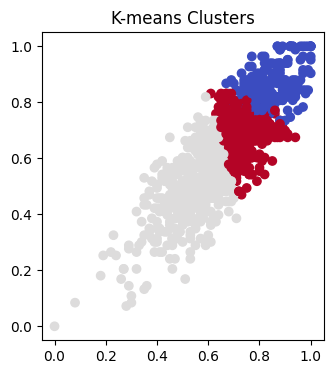

In [16]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(scaled_data.iloc[:, 0], scaled_data.iloc[:, 1], c=clusters, cmap='coolwarm')
plt.title('K-means Clusters')

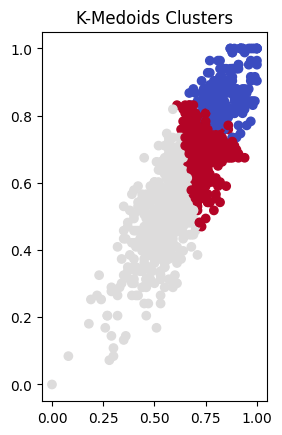

In [17]:
plt.subplot(1, 2, 2)
plt.scatter(scaled_data.iloc[:, 0], scaled_data.iloc[:, 1], c=clusters_medoids, cmap='coolwarm')
plt.title('K-Medoids Clusters')
plt.show()

# Step: 15 Implement K- Means with Library
# Sample data points
data = [
    [1, 2], [2, 3], [3, 4],
    [10, 11], [11, 12], [12, 13],
    [50, 51], [51, 52], [52, 53]
]

In [18]:
sample_data = [
    [1, 2], [2, 3], [3, 4],
    [10, 11], [11, 12], [12, 13],
    [50, 51], [51, 52], [52, 53]
]